<h1>Đưa dữ liệu vào</h1>

In [ ]:
#nhập vào các thư viện phụ thuộc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#đưa data vào
df_train = pd.read_csv('train-spaceship.csv')
df_test = pd.read_csv('test-spaceship.csv')

In [ ]:
#xuất data ra để kiểm tra xem đúng không
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
#xem thông tin các thuộc tính về kiểu dữ liệu
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<h1>Tiền xử lý dữ liệu đầu vào - Data Preprocessing</h1>
<p>Trong đó có các bước như xử lý dữ liệu bị mất tích, xét dữ liệu này có cân bằng hay không?</p>

In [ ]:
#kiểm tra xem data này có các giá trị NaN hay không?
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

==> Có thể thấy rằng data này mất nhiều dữ liệu ở nhiều thuộc tính khác nhau, do đó cần phải xử lý trường hợp data bị mất bằng thư viện pandas.

Đầu tiên chúng ta cần phải phân các thuộc tính nào là object, các thuộc tính nào là float64.

In [ ]:
pid = ['PassengerId','Name']
CAT_NUM = [col for col in df_train.columns if df_train[col].dtype=='float64']
CAT_OBJ = [col for col in df_train.columns if df_train[col].dtype=='object' and col not in pid]
CAT_OBJ

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

Bước tiếp theo, mình sẽ tiến hành mã hóa các thuộc tính "object" bằng phương pháp LabelEncoder, nhằm giúp đưa các data về dạng số để train thích hợp hơn

In [ ]:
#đưa thư viện sklearn
import sklearn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for data in CAT_OBJ:
  df_train[data] = le.fit_transform(df_train[data])
  df_test[data] = le.fit_transform(df_test[data])
#mã hóa cho cột Transported
df_train['Transported'] = le.fit_transform(df_train['Transported'])
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [ ]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<ipython-input-45-375834248ce8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.Age,kde=True)


<Axes: xlabel='Age', ylabel='Density'>

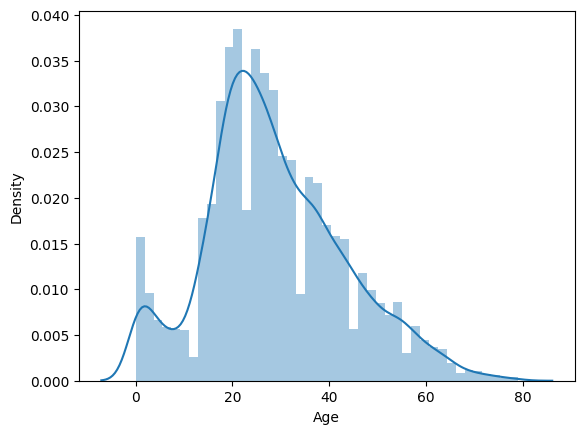

In [ ]:
#xử lý dữ liệu dạng float64 bị mất tích - xét thuộc tính Age -> vẽ biểu đồ -> tìm tuổi trung vị
#để có hướng nhập vào dữ liệu bị hổng.
sns.distplot(df_train.Age,kde=True)

In [ ]:
#bổ sung dữ liệu bị mất tích
# df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
# df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
# df_train['RoomService'].fillna(df_train['RoomService'].median(),inplace=True)
# df_test['RoomService'].fillna(df_test['RoomService'].median(), inplace=True)
# df_train['FoodCourt'].fillna(df_train['FoodCourt'].median(),inplace=True)
# df_test['FoodCourt'].fillna(df_test['FoodCourt'].median(), inplace=True)
# df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].median(),inplace=True)
# df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median(), inplace=True)
# df_train['Spa'].fillna(df_train['Spa'].median(),inplace=True)
# df_test['Spa'].fillna(df_test['Spa'].median(), inplace=True)
# df_train['VRDeck'].fillna(df_train['VRDeck'].median(),inplace=True)
# df_test['VRDeck'].fillna(df_test['VRDeck'].median(), inplace=True)

columns_to_fill = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for x in columns_to_fill:
  df_train[x].fillna(df_train[x].median(), inplace=True)
  df_test[x].fillna(df_test[x].median(), inplace=True)

In [ ]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [ ]:
#bỏ đi cột Name để tránh hiện tượng data vẫn mất tích
df_train_name_remove = df_train.drop(['Name'],axis=1)
df_train_name_remove.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
df_train_name_remove['Transported'].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

Có một nhận xét quan trọng đó là dữ liệu target thì cân bằng ổn, sự chênh lệch ở đây nhỏ nhưng không đáng kể

<h1>Data Visualization</h1>

In [ ]:
#xét tính đúng đắn giữa các thuộc tính với nhau
corr = df_train_name_remove.corr()
corr.Transported.sort_values(ascending=False)

<ipython-input-50-7b5c1dea8cb2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train_name_remove.corr()


Transported     1.000000
CryoSleep       0.404716
HomePlanet      0.107755
FoodCourt       0.045583
ShoppingMall    0.009391
VIP            -0.014260
Cabin          -0.052604
Age            -0.074233
Destination    -0.104817
VRDeck         -0.204874
Spa            -0.218545
RoomService    -0.241124
Name: Transported, dtype: float64

<Axes: >

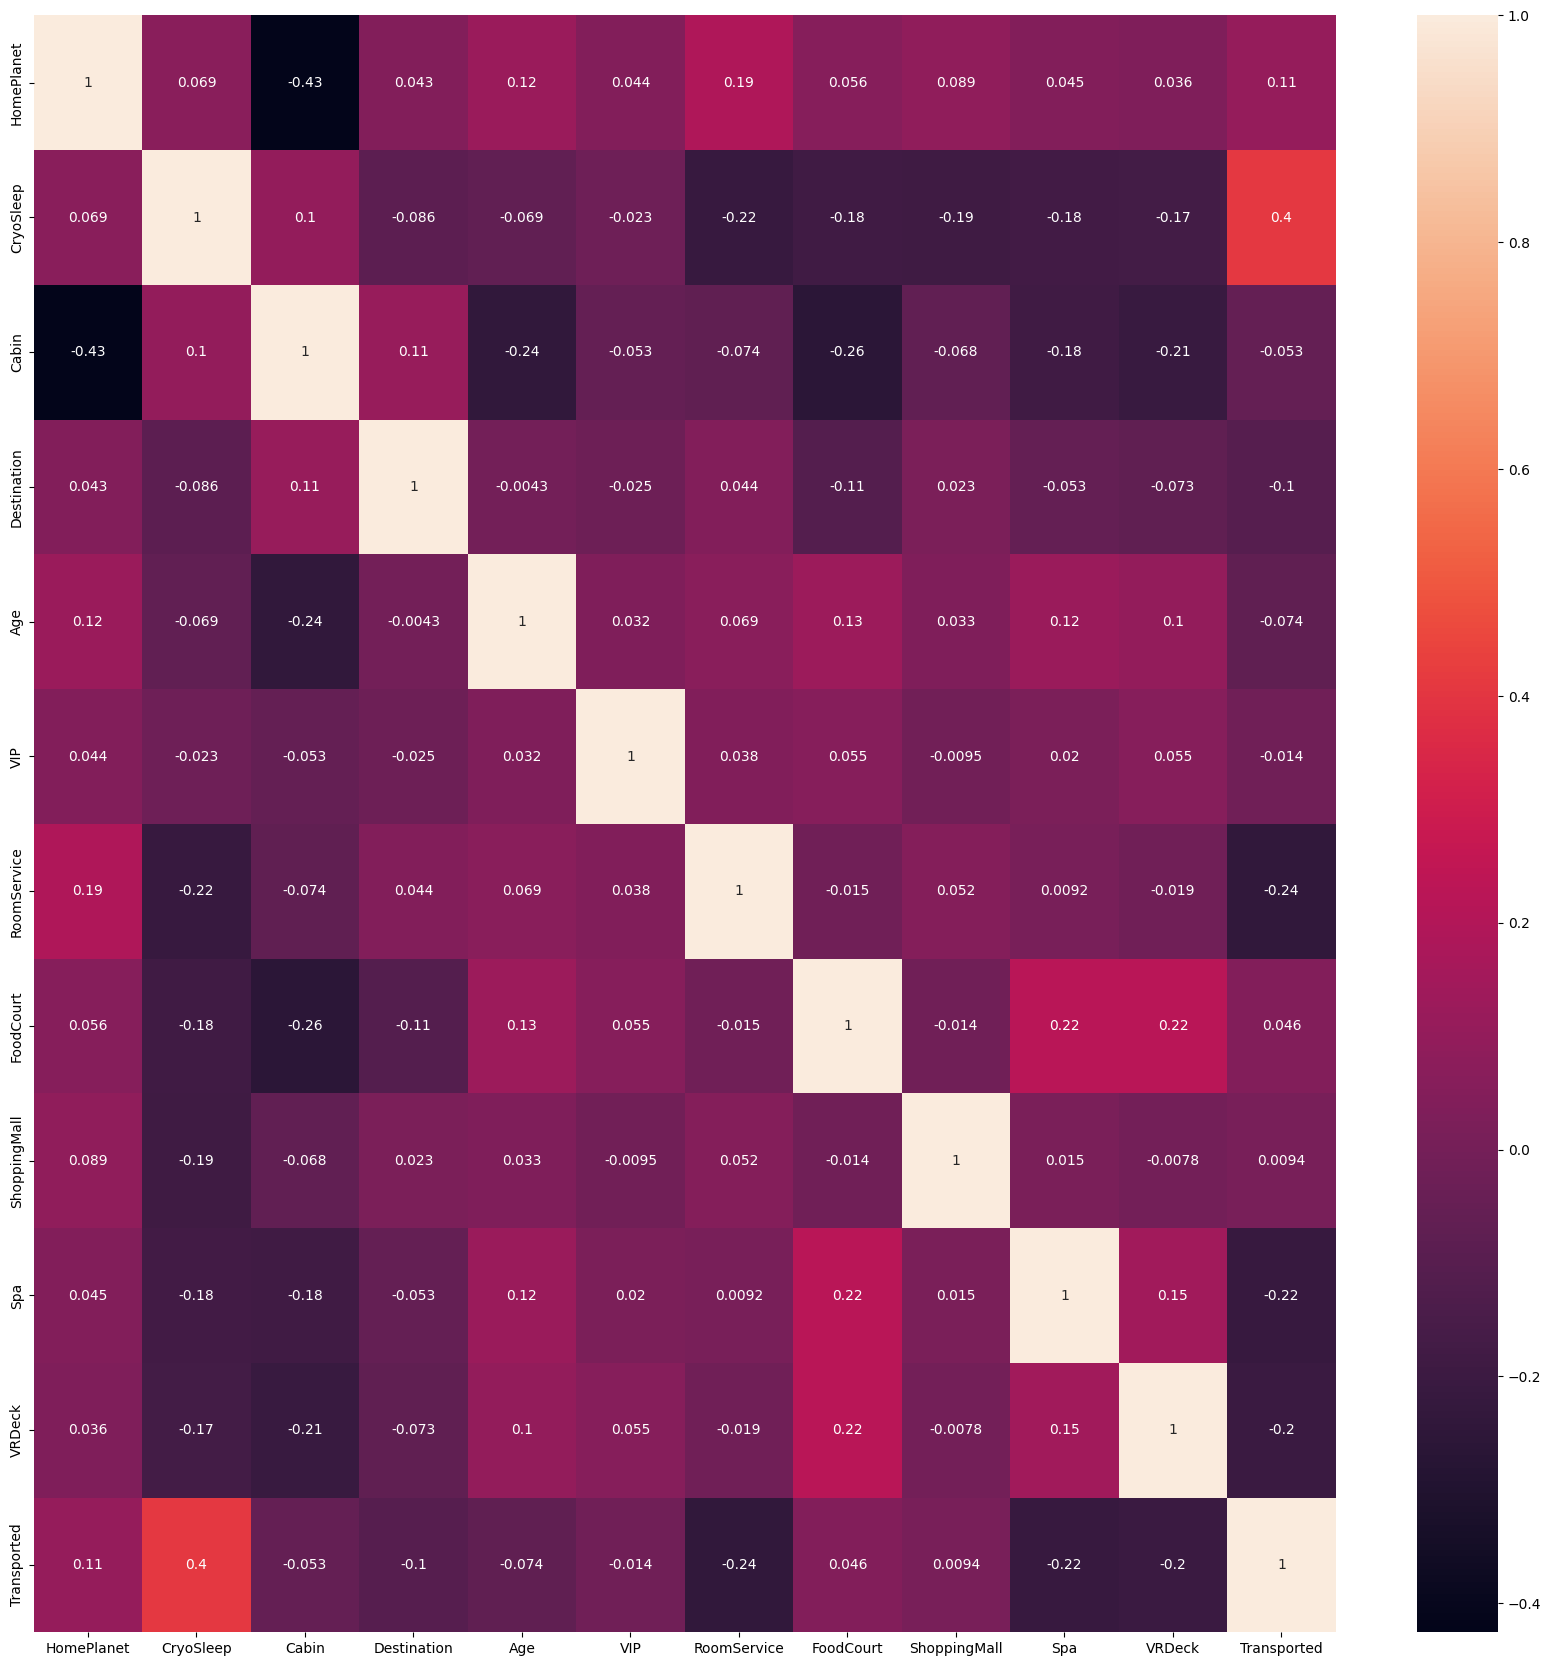

In [ ]:
#vẽ biểu đồ nhiệt để có thể hiểu rõ về dữ liệu
plt.figure(figsize=(21,21))
sns.heatmap(corr, annot=True)

In [ ]:
#hàm ones_like này có thể xây dựng một ma trận mang giá trị True, False
#với cùng kiểu dữ liệu
ones_corr = np.ones_like(corr, dtype=bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True

In [ ]:
ones_corr.shape, corr.shape

((12, 12), (12, 12))

In [ ]:
#np's triu: chỉ trả về ma trận tam giác nửa dưới trong ma trận vuông.
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True

<Axes: >

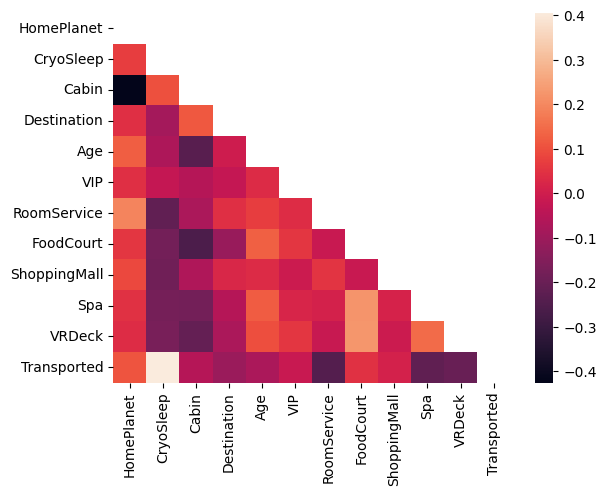

In [ ]:
sns.heatmap(data=corr, mask=mask)
#mask = mask: chỉ trả về nửa dưới ma trận tam giác trong ma trận vuông

<Axes: xlabel='Transported', ylabel='CryoSleep'>

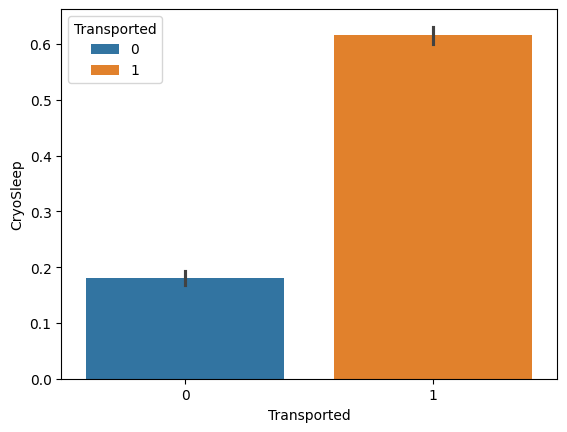

In [ ]:
sns.barplot(x=df_train_name_remove.Transported, y=df_train_name_remove.CryoSleep,
            data=df_train_name_remove, hue='Transported')

<h1>Train Model</h1>

In [ ]:
#b1: tách dữ liệu
x = df_train_name_remove.drop(['Transported','PassengerId'],axis=1)
y = df_train_name_remove.Transported
print(x)
print(y)

      HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  RoomService  \
0              1          0    149            2  39.0    0          0.0   
1              0          0   2184            2  24.0    0        109.0   
2              1          0      1            2  58.0    1         43.0   
3              1          0      1            2  33.0    0          0.0   
4              0          0   2186            2  16.0    0        303.0   
...          ...        ...    ...          ...   ...  ...          ...   
8688           1          0    146            0  41.0    1          0.0   
8689           0          1   5280            1  18.0    0          0.0   
8690           0          0   5285            2  26.0    0          0.0   
8691           1          0   2131            0  32.0    0          0.0   
8692           1          0   2131            2  44.0    0        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  
0           0.0           0.0     0.0     0.0  
1  

In [ ]:
#Cho vào train test split
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((6954, 11), (1739, 11), (6954,), (1739,))

<h1>Tìm hiểu về XGBoost</h1>
XGBoost là viết tắt của Extreme Gradient Boosting. Đây là thuật toán state-of-the-art nhằm giải quyết bài toán supervised learning cho độ chính xác khá cao bên cạnh mô hình Deep learning như chúng ta từng tìm hiểu.

Nếu Deep learning chỉ nhận đầu vào là raw data dạng numerical (ta thường phải chuyển đổi sang n-vector trong không gian số thực) thì XGBoost nhận đầu vào là tabular datasets với mọi kích thước và dạng dữ liệu bao gồm cả categorical mà dạng dữ liệu này thường được tìm thấy nhiều hơn trong business model, đây là lý do đầu tiên tại sao các cá nhân tham gia Kaggle thường sử dụng.

In [ ]:
#sử dụng xgboost cho bài toán phân loại
import xgboost as xgb
model = xgb.XGBClassifier()
#fit vào 2 dữ liệu phân chia
model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(Xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred, Ytest))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       849
           1       0.79      0.78      0.78       890

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



<Axes: >

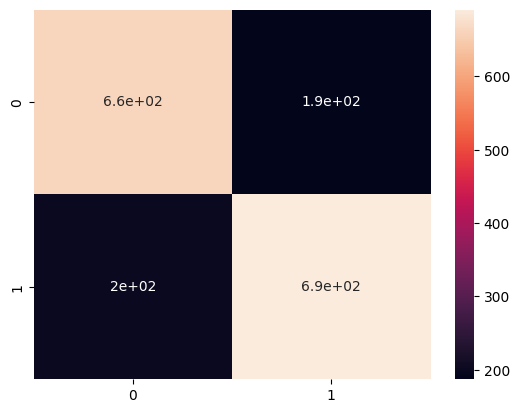

In [ ]:
sns.heatmap(confusion_matrix(y_pred, Ytest),annot=True)

<h1>Nộp thử prediction từ test.csv lên Kaggle</h1>

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

param_grid = {
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'learning_rate': [0.2],
    'max_depth': [7],
    'min_child_weight': [5],
    'reg_alpha': [1.0],
    'subsample': [1.0]
}

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import GridSearchCV

#df_test is already defined with the required columns
df_test_name_remove = df_test.drop(['Name','PassengerId'],axis=1)
X_test = df_test_name_remove.copy()

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

param_grid = {
    'colsample_bytree': [0.8],
    'gamma': [0.1],
    'learning_rate': [0.2],
    'max_depth': [7],
    'min_child_weight': [5],
    'reg_alpha': [1.0],
    'subsample': [1.0]
}

# Using Xtrain and Ytrain (I have defined them)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=3)
grid_search.fit(Xtrain, Ytrain)

print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)

# Creating a new XGBoost model with the best parameters
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **grid_search.best_params_)

# Training the model on the entire training dataset
best_xgb_model.fit(Xtrain, Ytrain)

# Making predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Creating a submission DataFrame
submission_df = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Transported': y_pred})

# Saving the submission file
submission_df.to_csv('Hoang-submission-complete.csv', index=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.880 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.890 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.879 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.879 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, min_child_weight=5, reg_alpha=1.0, subsample=1.0;, score=0.891 total time=   0.2s
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'reg_alpha': 1.0, 'subs

In [ ]:
testFile = pd.read_csv('Hoang-submission-complete.csv')
testFile

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [ ]:
testFile.replace({'Transported':{0: 'False', 1: 'True'}},inplace=True)

In [ ]:
testFile.to_csv('Hoang-final-submit.csv',index=False)